<a href="https://colab.research.google.com/github/benmanjackson/CS290/blob/main/GaussianMixtureModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12/09/24 Homework

## Task



* implement the gaussian mixture model and apply it to both the iris dataset and the penguins dataset
* Iris can be found through sklearn.datasets



[Palmer penguins dataset](https://allisonhorst.github.io/palmerpenguins/).



## Load and inspect the data

In [15]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [16]:
#Penguins dataframe
df_penguins = pd.read_csv("https://github.com/benmanjackson/CS290/raw/refs/heads/main/penguins.csv")

In [17]:
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [18]:
print(df_penguins.columns)

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


In [19]:
#Preprocess our penguins:
df_penguins.dropna(inplace=True)
X_penguins = df_penguins[["bill_length_mm", "bill_depth_mm"]].values #Two features used
X_penguins = StandardScaler().fit_transform(X_penguins)

In [20]:
#Iris dataframe:
data_iris = load_iris()
X_iris = data_iris.data[:, :2] #Two features used
X_iris = StandardScaler().fit_transform(X_iris)

In [21]:
#Plotting our Gaussian Mixture Model:
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(
        np.linspace(mins[0], maxs[0], resolution),
        np.linspace(mins[1], maxs[1], resolution)
    )
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(
        xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12)
    )
    plt.contour(
        xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors="k"
    )

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors="r", linestyles="dashed")

    plt.plot(X[:, 0], X[:, 1], "k.", markersize=2)
    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

##EVALUATION

In [22]:
#Penguins Gaussian Mixture Model:
gmm_penguins = GaussianMixture(n_components=3, n_init=10, random_state=42)
gmm_penguins.fit(X_penguins)

GaussianMixture(n_components=3, n_init=10, random_state=42)

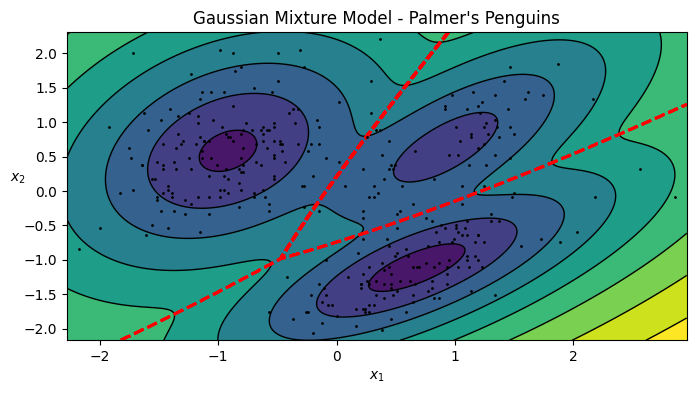

In [23]:
#Penguin Plotting:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gmm_penguins, X_penguins)
plt.title("Gaussian Mixture Model - Palmer's Penguins")
plt.show()

In [24]:
#Model Properties for Penguins
print("Penguins Dataset:")
print("Weights:", gmm_penguins.weights_)
print("Means:\n", gmm_penguins.means_)
print("Covariances:\n", gmm_penguins.covariances_)
print("Converged:", gmm_penguins.converged_)
print("Iterations:", gmm_penguins.n_iter_)

Penguins Dataset:
Weights: [0.45550429 0.35059611 0.1938996 ]
Means:
 [[-0.91637011  0.5839904 ]
 [ 0.67791409 -1.11226016]
 [ 0.92695639  0.63921717]]
Covariances:
 [[[0.25427592 0.10204983]
  [0.10204983 0.38345409]]

 [[0.34786563 0.21539556]
  [0.21539556 0.24965469]]

 [[0.26809709 0.21971086]
  [0.21971086 0.35844942]]]
Converged: True
Iterations: 13


In [25]:
#Iris Gaussian Mixture Model:
gmm_iris = GaussianMixture(n_components=3, n_init=10, random_state=42)
gmm_iris.fit(X_iris)

GaussianMixture(n_components=3, n_init=10, random_state=42)

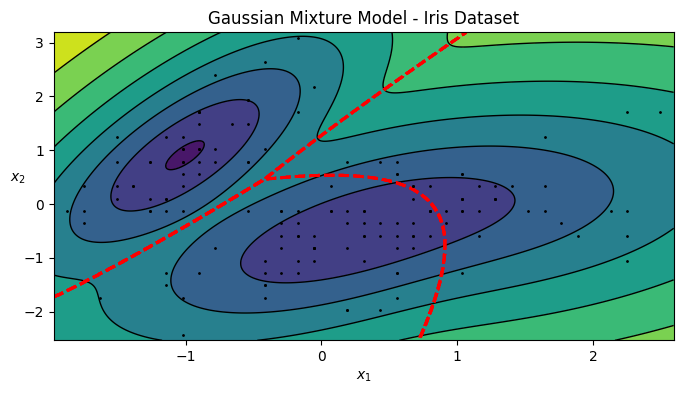

In [26]:
#Iris Plotting:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gmm_iris, X_iris)
plt.title("Gaussian Mixture Model - Iris Dataset")
plt.show()

In [27]:
#Model Properties of Iris:
print("\nIris Dataset:")
print("Weights:", gmm_iris.weights_)
print("Means:\n", gmm_iris.means_)
print("Covariances:\n", gmm_iris.covariances_)
print("Converged:", gmm_iris.converged_)
print("Iterations:", gmm_iris.n_iter_)


Iris Dataset:
Weights: [0.40579535 0.26978349 0.32442115]
Means:
 [[ 0.10177427 -0.70309015]
 [ 1.0538755  -0.03321509]
 [-1.00368837  0.90706662]]
Covariances:
 [[[0.41600689 0.25262532]
  [0.25262532 0.4987097 ]]

 [[0.53247079 0.12529994]
  [0.12529994 0.46446326]]

 [[0.17532009 0.24643925]
  [0.24643925 0.63035859]]]
Converged: True
Iterations: 8


## Have a great day!